# **Data 620 Project 1**
Seung Min Song, Krutika Patel<br>

02/27/2024

# **Overview**

Centrality measures can be used to predict (positive or negative) outcomes for a node.

Your task in this week’s assignment is to identify an interesting set of network data that is available on the web (either through web scraping or web APIs) that could be used for analyzing and comparing centrality measures across nodes.  As an additional constraint, there should be at least one categorical variable available for each node (such as “Male” or “Female”; “Republican”, “Democrat,” or “Undecided”, etc.)

In addition to identifying your data source, you should create a high-level plan that describes how you would load the data for analysis, and describe a hypothetical outcome that could be predicted from comparing degree centrality across categorical groups.

# **Research Question**

In this project, the goal is to explore not only the collaborations between actors but also the associations among movice rating. Throughout the research process, the plan is to delve deeper into these relationships by examining key network metrics such as degree centrality and eigenvector centrality.

# **Data Source**

For this project we propose to use the following two datasets:

* IMDB Films By Actor For 10K Actors https://www.kaggle.com/datasets/darinhawley/imdb-films-by-actor-for-10k-actors
    * The dataset has the following attributes:
        * Actor, ActorID, Film, Year, Votes, Rating, FilmID
* IMDb Movie Dataset: All Movies by Genre https://www.kaggle.com/datasets/rajugc/imdb-movies-dataset-based-on-genre
    * The dataset has the following attributes
        * movie_id, movie_name, year, certificate, runtime, genre, rating, description, director, director_id, star, star_id, votes, gross(in $)

# **Data Wrangling**

Include:

* Merging datasets
* Remove duplicate and unrelated columns

In order to create a singular dataset the two datasets will be joined by the 'FilmID' and 'movie_id' attributes that represent the same values in both datasets. Each row of the new dataset will have the following values: Actor, ActorID, Film, Year, Votes, Rating, FilmID, certificate, runtime, genre, and director.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

actors = pd.read_csv('https://raw.githubusercontent.com/seung-m1nsong/620/main/Project%201/actorfilms.csv')
actors.head()

,Actor,ActorID,Film,Year,Votes,Rating,FilmID
0,Fred Astaire,nm0000001,Ghost Story,1981,7731,6.3,tt0082449
1,Fred Astaire,nm0000001,The Purple Taxi,1977,533,6.6,tt0076851
2,Fred Astaire,nm0000001,The Amazing Dobermans,1976,369,5.3,tt0074130
3,Fred Astaire,nm0000001,The Towering Inferno,1974,39888,7.0,tt0072308
4,Fred Astaire,nm0000001,Midas Run,1969,123,4.8,tt0064664


In [3]:
action= pd.read_csv('https://raw.githubusercontent.com/seung-m1nsong/620/main/Project%201/action.csv')
action.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN


In [4]:
merged_df = pd.merge(actors, action, left_on='FilmID', right_on='movie_id', how='inner')
merged_df.head(1)

,Actor,ActorID,Film,Year,Votes,Rating,FilmID,movie_id,movie_name,year,...,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,Fred Astaire,nm0000001,The Towering Inferno,1974,39888,7.0,tt0072308,tt0072308,The Towering Inferno,1974,...,165 min,"Action, Drama, Thriller",7.0,"At the opening party of a colossal, but poorly...",John Guillermin,/name/nm0347086/,"Paul Newman, \nSteve McQueen, \nWilliam Holden...","/name/nm0000056/,/name/nm0000537/,/name/nm0000...",45059.0,116000000.0


### **Mising Value**

In [5]:
# check missing values
print(merged_df.isnull().sum())


Actor              0
ActorID            0
Film               0
Year               0
Votes              0
Rating             0
FilmID             0
movie_id           0
movie_name         0
year               0
certificate     1862
runtime           60
genre              0
rating             0
description        0
director           0
director_id        0
star              23
star_id            0
votes              0
gross(in $)    14984
dtype: int64


In [6]:
# Specify the list of columns to be deleted
columns_to_delete = ['description', 'director_id', 'star', 'star_id', 'votes', 'gross(in $)']

# Delete the specified columns from the DataFrame
merged_df = merged_df.drop(columns=columns_to_delete)

# Print the modified DataFrame
print(merged_df.head(1))

          Actor    ActorID                  Film  Year  Votes  Rating  \
0  Fred Astaire  nm0000001  The Towering Inferno  1974  39888     7.0   

      FilmID   movie_id            movie_name  year certificate  runtime  \
0  tt0072308  tt0072308  The Towering Inferno  1974          PG  165 min   

                     genre  rating         director  
0  Action, Drama, Thriller     7.0  John Guillermin  


In [7]:
# Delete repeated columns
repeated_columns = ['movie_id', 'movie_name', 'year', 'rating']

# Delete the specified columns from the DataFrame
merged_df = merged_df.drop(columns=repeated_columns)

# Print the modified dataframe
print(merged_df.head(1))

          Actor    ActorID                  Film  Year  Votes  Rating  \
0  Fred Astaire  nm0000001  The Towering Inferno  1974  39888     7.0   

      FilmID certificate  runtime                    genre         director  
0  tt0072308          PG  165 min  Action, Drama, Thriller  John Guillermin  


In [8]:
# Check missing values
print(merged_df.isnull().sum())

Actor             0
ActorID           0
Film              0
Year              0
Votes             0
Rating            0
FilmID            0
certificate    1862
runtime          60
genre             0
director          0
dtype: int64


In [9]:
merged_df['director'] = merged_df['director'].str.replace(',', '')


## **Data preprocessing**

To optimize network analysis, it's essential to select appropriate data. Initially, due to the size of the current dataset, we'll narrow our focus to the 2021 data exclusively. Furthermore, we'll filter the data to include only records with a Rating of 7 or higher.

Also, we used certificate (movie rating) as the categorical value.

In [10]:
movie_df = merged_df[((merged_df['Year'] == 2021)) & (merged_df['Rating'] >= 7)].dropna(subset=['Year', 'Rating'])
movie_df


,Actor,ActorID,Film,Year,Votes,Rating,FilmID,certificate,runtime,genre,director
4095,Kevin Costner,nm0000126,Zack Snyder's Justice League,2021,242474,8.2,tt12361974,R,242 min,"Action, Adventure, Fantasy",Zack Snyder
4096,Russell Crowe,nm0000128,Zack Snyder's Justice League,2021,242474,8.2,tt12361974,R,242 min,"Action, Adventure, Fantasy",Zack Snyder
4097,Diane Lane,nm0000178,Zack Snyder's Justice League,2021,242474,8.2,tt12361974,R,242 min,"Action, Adventure, Fantasy",Zack Snyder
4098,Ben Affleck,nm0000255,Zack Snyder's Justice League,2021,242474,8.2,tt12361974,R,242 min,"Action, Adventure, Fantasy",Zack Snyder
4099,Willem Dafoe,nm0000353,Zack Snyder's Justice League,2021,242474,8.2,tt12361974,R,242 min,"Action, Adventure, Fantasy",Zack Snyder
...,...,...,...,...,...,...,...,...,...,...,...
33063,Kelly Marie Tran,nm4511652,Raya and the Last Dragon,2021,42038,7.5,tt5109280,PG,107 min,"Animation, Action, Adventure",Don Hall \nCarlos López Estrada \nPaul Briggs ...
33064,Ross Butler,nm5224900,Raya and the Last Dragon,2021,42038,7.5,tt5109280,PG,107 min,"Animation, Action, Adventure",Don Hall \nCarlos López Estrada \nPaul Briggs ...
33065,Awkwafina,nm5377144,Raya and the Last Dragon,2021,42038,7.5,tt5109280,PG,107 min,"Animation, Action, Adventure",Don Hall \nCarlos López Estrada \nPaul Briggs ...
33066,Patti Harrison,nm8773928,Raya and the Last Dragon,2021,42038,7.5,tt5109280,PG,107 min,"Animation, Action, Adventure",Don Hall \nCarlos López Estrada \nPaul Briggs ...


In [11]:
# Get information about the filtered DataFrame
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 4095 to 36220
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Actor        86 non-null     object 
 1   ActorID      86 non-null     object 
 2   Film         86 non-null     object 
 3   Year         86 non-null     int64  
 4   Votes        86 non-null     int64  
 5   Rating       86 non-null     float64
 6   FilmID       86 non-null     object 
 7   certificate  86 non-null     object 
 8   runtime      86 non-null     object 
 9   genre        86 non-null     object 
 10  director     86 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 8.1+ KB


In [12]:
# Count the number of movies in each genre
certificate_counts = movie_df['certificate'].str.split(',').explode().value_counts()

# Print the result
print(certificate_counts)

R            64
PG           13
PG-13         8
Not Rated     1
Name: certificate, dtype: int64


## **Dataset Transformation**

To prepare the dataset for network analysis, we need to modify its format. Presently, when a title features multiple performers, multiple records are generated. Utilizing the groupby function, we will aggregate the cast members and certificate for each title into a list. This approach ensures the elimination of duplicate titles in the dataset.

In [13]:
movie_df2 = merged_df[((merged_df['Year'] == 2021) & (merged_df['Rating'] >= 7) & (merged_df['certificate'].isin(['R', 'PG', 'PG-13'])))].dropna(subset=['Year', 'Rating', 'certificate'])
movie_df2.head()

,Actor,ActorID,Film,Year,Votes,Rating,FilmID,certificate,runtime,genre,director
4095,Kevin Costner,nm0000126,Zack Snyder's Justice League,2021,242474,8.2,tt12361974,R,242 min,"Action, Adventure, Fantasy",Zack Snyder
4096,Russell Crowe,nm0000128,Zack Snyder's Justice League,2021,242474,8.2,tt12361974,R,242 min,"Action, Adventure, Fantasy",Zack Snyder
4097,Diane Lane,nm0000178,Zack Snyder's Justice League,2021,242474,8.2,tt12361974,R,242 min,"Action, Adventure, Fantasy",Zack Snyder
4098,Ben Affleck,nm0000255,Zack Snyder's Justice League,2021,242474,8.2,tt12361974,R,242 min,"Action, Adventure, Fantasy",Zack Snyder
4099,Willem Dafoe,nm0000353,Zack Snyder's Justice League,2021,242474,8.2,tt12361974,R,242 min,"Action, Adventure, Fantasy",Zack Snyder


Following this procedure, we will streamline our dataset to solely include the actor's name. Therefore, we will create a new dataframe containing only the title (Film), the actor's name (Actor) and the movie rating (certificate). 

In [14]:
movie_df2_join = movie_df2.groupby(['Film']).agg({'Actor': list, 'certificate': list}).reset_index()
movie_df2_join

,Film,Actor,certificate
0,Born a Champion,"[Dennis Quaid, Sean Patrick Flanery, Maurice C...","[R, R, R, R, R, R, R]"
1,Free Guy,"[Ryan Reynolds, Taika Waititi, Matty Cardaropl...","[PG-13, PG-13, PG-13, PG-13, PG-13, PG-13, PG-..."
2,Nobody,"[Michael Ironside, Christopher Lloyd, Connie N...","[R, R, R, R, R, R, R, R, R, R, R, R, R, R, R, ..."
3,Raya and the Last Dragon,"[Daniel Dae Kim, Sung Kang, Sandra Oh, Lucille...","[PG, PG, PG, PG, PG, PG, PG, PG, PG, PG, PG, P..."
4,Zack Snyder's Justice League,"[Kevin Costner, Russell Crowe, Diane Lane, Ben...","[R, R, R, R, R, R, R, R, R, R, R, R, R, R, R, ..."


In [15]:
from itertools import combinations

movie_df2_join['Actor'] = movie_df2_join['Actor'].apply(lambda l: list(combinations(l, 2)))

movie_df2_join = movie_df2_join.explode('Actor').dropna()

movie_df2_join['certificate'] = movie_df2_join['certificate'].apply(lambda x: x[0] if isinstance(x, list) else x)

movie_df2_join.head()




,Film,Actor,certificate
0,Born a Champion,"(Dennis Quaid, Sean Patrick Flanery)",R
0,Born a Champion,"(Dennis Quaid, Maurice Compte)",R
0,Born a Champion,"(Dennis Quaid, Currie Graham)",R
0,Born a Champion,"(Dennis Quaid, Costas Mandylor)",R
0,Born a Champion,"(Dennis Quaid, Reno Wilson)",R


Create an empty list to store the combinations.

In [16]:

nt_list = []

# Iterate over unique certificates
for certificate in movie_df2_join['certificate'].unique():
    # Filter the DataFrame for the current certificate
    subset = movie_df2_join[movie_df2_join['certificate'] == certificate]
    # Create combinations of 'Actor' for the current certificate
    for _, row in subset.iterrows():
        actors = row['Actor']
        for source, target in combinations(actors, 2):
            nt_list.append({'source': source, 'target': target, 'certificate': certificate})

# Create a new DataFrame from the list
nt = pd.DataFrame(nt_list)

print(nt)

               source                target certificate
0        Dennis Quaid  Sean Patrick Flanery           R
1        Dennis Quaid        Maurice Compte           R
2        Dennis Quaid         Currie Graham           R
3        Dennis Quaid       Costas Mandylor           R
4        Dennis Quaid           Reno Wilson           R
..                ...                   ...         ...
978  Kelly Marie Tran             Awkwafina          PG
979  Kelly Marie Tran        Patti Harrison          PG
980       Ross Butler             Awkwafina          PG
981       Ross Butler        Patti Harrison          PG
982         Awkwafina        Patti Harrison          PG

[983 rows x 3 columns]


## **Network Analysis**

Once the dataset is prepared, we will proceed with network analysis by converting the dataset into a graph using NetworkX. This involves representing each actor as a node in the graph and each combination of actors from the same work as an edge. The weight of each edge will be determined by the frequency of occurrence of the actor combination.

The number of connections an actor has (n) is calculated by aggregating the weight of each connection of an actor. The value is used to determine the connectedness of an actor.

In [17]:
import networkx as nx

nt.drop_duplicates(subset=['source', 'target'], inplace=True)  

G = nx.from_pandas_edgelist(nt,  source='source', target='target')

In [18]:
nt['weight'] = nt.groupby(['source', 'target'])['source'].transform('size')
nt = nt.dropna()
nt
#nt.to_csv('nt.csv', index=False)


,source,target,certificate,weight
0,Dennis Quaid,Sean Patrick Flanery,R,1
1,Dennis Quaid,Maurice Compte,R,1
2,Dennis Quaid,Currie Graham,R,1
3,Dennis Quaid,Costas Mandylor,R,1
4,Dennis Quaid,Reno Wilson,R,1
...,...,...,...,...
978,Kelly Marie Tran,Awkwafina,PG,1
979,Kelly Marie Tran,Patti Harrison,PG,1
980,Ross Butler,Awkwafina,PG,1
981,Ross Butler,Patti Harrison,PG,1


In [19]:
node_sizes = nt.groupby('source').weight.agg(sum)
n = node_sizes.add_suffix('').reset_index()
n
#n.to_csv('n.csv', index=False)

,source,weight
0,Agusta Eva Erlendsdottir,9
1,Alain Moussi,3
2,Alan Tudyk,8
3,Aleksey Serebryakov,14
4,Amber Heard,11
...,...,...
74,Taika Waititi,6
75,Utkarsh Ambudkar,4
76,Willem Dafoe,32
77,Yulia Guzhva,9


## **Visualization**

Visualize the network and save it as a file. The visualization results are displayed within the Jupyter notebook and saved as image files.

In this visualization, categories were grouped based on movie rating (certificate), and the node size was adjusted according to the weight of the node. This approach allows for a more granular analysis of the network, highlighting the relationships between nodes based on their respective ratings and weights.

 * 'R' = red
 * 'PG' = green
 * 'PG-13' = blue

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(nt, 'source', 'target',
                            create_using=nx.DiGraph(), edge_attr='weight')


In [21]:
cdn_resources='in_line'

In [22]:
from pyvis.network import Network

net = Network(notebook=True)

In [23]:
for node in G:
    
    if node in list(n['source']):
        sz = (list(n['weight'][n['source'] == node])[0])+1
    else:
        sz = 1    
    net.add_node(node, label=node, size = sz)


In [24]:
# Add edges to the network

for edge in G.edges():
    
    rating = list(nt['certificate'][(nt['source'] == edge[0]) & (nt['target'] == edge[1])])
    
    if ('R' in rating):
        net.add_edge(edge[0], edge[1], color = 'red')
    elif ('PG' in rating):
        net.add_edge(edge[0], edge[1], color = 'green')
    else:
        net.add_edge(edge[0], edge[1], color = 'blue')
        

In [25]:
# Show the network
net.show_buttons(filter_=['nodes'])
net.save_graph('plot2.html')
net.show('plot2.html')

#net.write_html('subgraph.html')  # save a html file in current dir


plot2.html


## **Degree and Eigenvector Centrality**

Degree Centrality is an indicator of how many other nodes a node is connected to. Eigenvector Centrality is an indicator that assumes that the importance of a node is determined by the number of other important nodes connected to that node. In other words, eigenvector centrality determines the importance of a node by considering the importance of its connected nodes.

### Degree Centrality

Most actors who appeared in the same movie had the same degree centrality value. However, in the case of Connie Nielsen, her value is higher than that of other actors because she participated in two movies with ratings of 7 or higher.

In [ ]:
# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G)
sorted_deg_cen=sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)

top_10_degree = sorted_deg_cen[:10]
bottom_10_degree = sorted_deg_cen[-10:]

print("Top 10 nodes by eigenvector centrality:")
for node, value in top_10_degree:
    print(f"{node}: {value}")

print("\nBottom 10 nodes by eigenvector centrality:")
for node, value in bottom_10_degree:
    print(f"{node}: {value}")

Top 10 nodes by eigenvector centrality:
Connie Nielsen: 0.6626506024096386
Kevin Costner: 0.43373493975903615
Russell Crowe: 0.43373493975903615
Diane Lane: 0.43373493975903615
Ben Affleck: 0.43373493975903615
Willem Dafoe: 0.43373493975903615
Jeremy Irons: 0.43373493975903615
David Thewlis: 0.43373493975903615
Robin Wright: 0.43373493975903615
Billy Crudup: 0.43373493975903615

Bottom 10 nodes by eigenvector centrality:
Jodie Comer: 0.08433734939759037
Joe Keery: 0.08433734939759037
Camille Kostek: 0.08433734939759037
Dennis Quaid: 0.07228915662650603
Sean Patrick Flanery: 0.07228915662650603
Maurice Compte: 0.07228915662650603
Currie Graham: 0.07228915662650603
Costas Mandylor: 0.07228915662650603
Reno Wilson: 0.07228915662650603
Katrina Bowden: 0.07228915662650603


### Eigenvector_Centrality

Eigenvector centrality focuses on the target nodes in a network, while degree centrality focuses on the source nodes. This difference is why eigenvector centrality can be different from degree centrality. Based on this analysis, degree centrality is more suitable for your network analysis.

In [45]:
ei_cen = nx.eigenvector_centrality(G, max_iter=1000)
sorted_ei_cen= sorted(ei_cen.items(), key=lambda x: x[1], reverse=True)

top_10 = sorted_ei_cen[:10]
bottom_10 = sorted_ei_cen[-10:]

print("Top 10 nodes by eigenvector centrality:")
for node, value in top_10:
    print(f"{node}: {value}")

print("\nBottom 10 nodes by eigenvector centrality:")
for node, value in bottom_10:
    print(f"{node}: {value}")


Top 10 nodes by eigenvector centrality:
Brooke Ence: 0.9986918590498586
Ryan Zheng: 0.05106947006504912
Kiersey Clemons: 0.0025425767457705694
Ray Fisher: 0.00012314474267264812
Samantha Win: 5.797113421108957e-06
Ezra Miller: 2.65010899250695e-07
Lisa Loven Kongsli: 1.175298694817098e-08
Gal Gadot: 5.051427055087801e-10
Megan Best: 4.841252902150167e-10
Doutzen Kroes: 2.1017415293765588e-11

Bottom 10 nodes by eigenvector centrality:
Sean Patrick Flanery: 1.8972462140472215e-58
Christopher Lloyd: 1.8972462140472215e-58
Russell Crowe: 1.8972462140472215e-58
Taika Waititi: 1.8972462140472215e-58
Sung Kang: 1.8972462140472215e-58
Dennis Quaid: 2.83594351875519e-61
Michael Ironside: 2.83594351875519e-61
Kevin Costner: 2.83594351875519e-61
Ryan Reynolds: 2.83594351875519e-61
Daniel Dae Kim: 2.83594351875519e-61


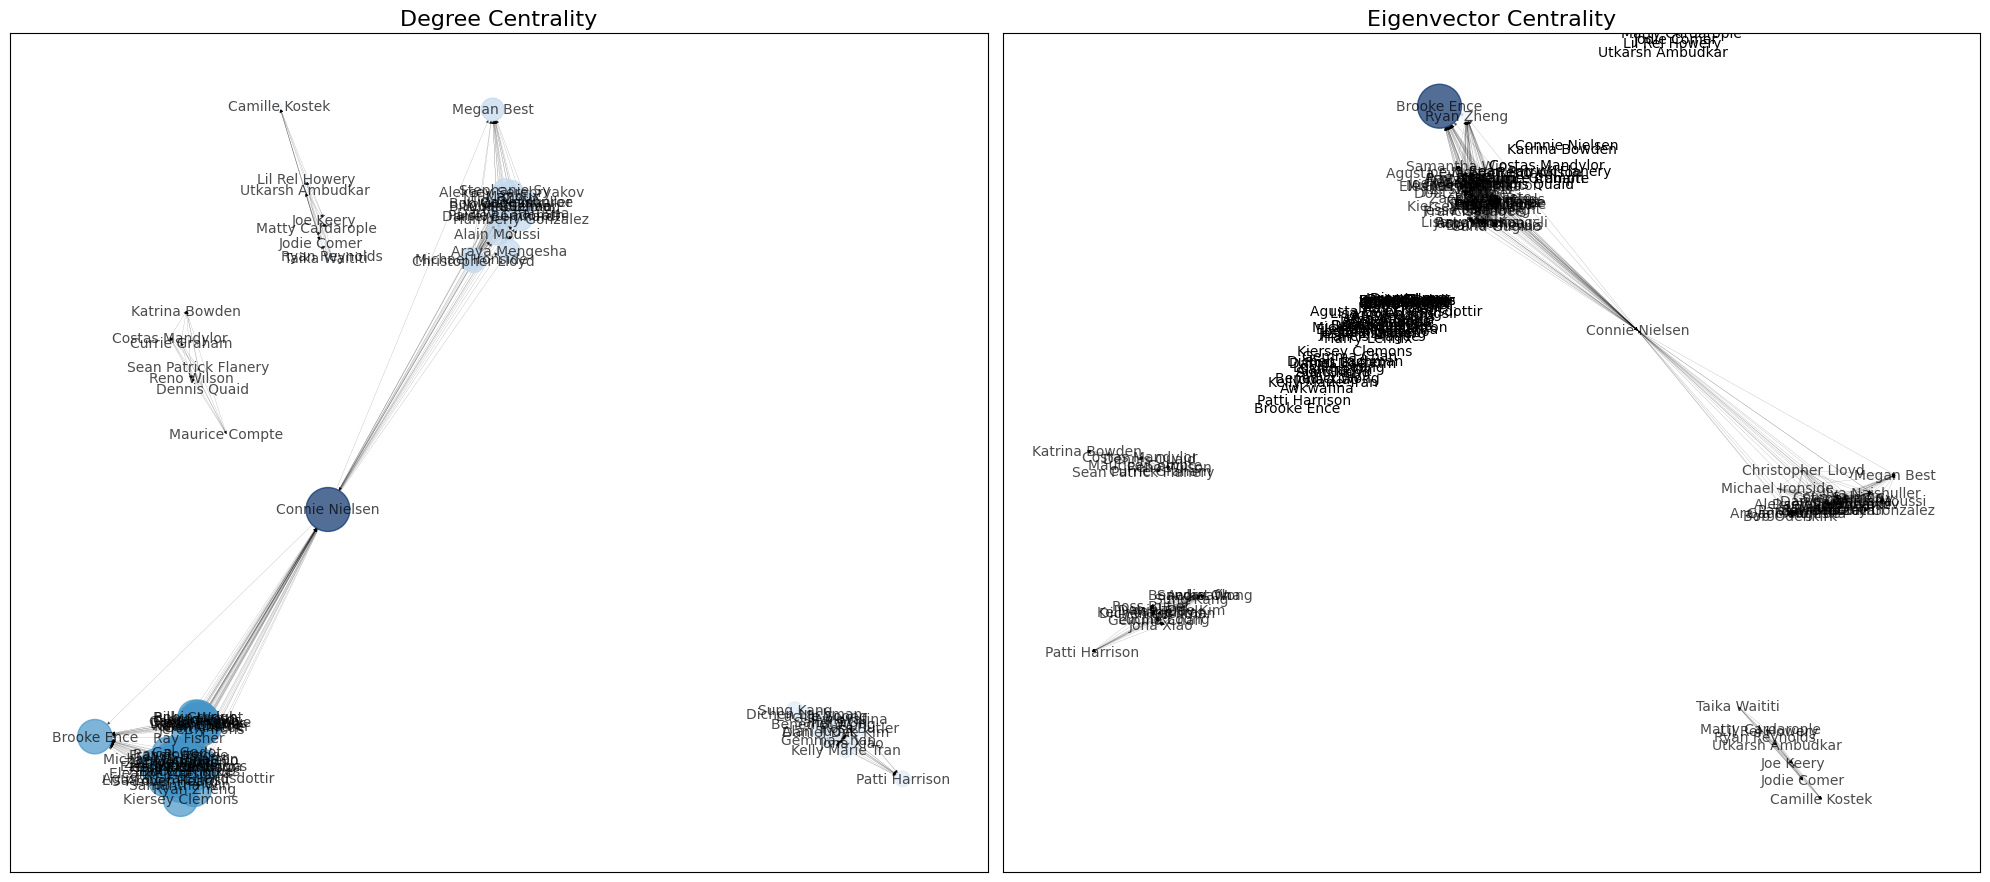

In [26]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

G = nx.from_pandas_edgelist(nt, 'source', 'target',
                            create_using=nx.DiGraph(), edge_attr='weight')

def get_node_size(node_val):
    nsize = np.array([v for v in node_val])
    nsize = 1000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))
    return nsize

# Calculate centrality measures
deg_cen = nx.degree_centrality(G).values()
ei_cen = nx.eigenvector_centrality(G, max_iter=1000, weight='weight').values()
#cc = nx.closeness_centrality(G, distance='weight').values()
#bc = nx.betweenness_centrality(G).values()

plt.figure(figsize=(20,26))

pos = nx.spring_layout(G) 

plt.subplot(321)
plt.title('Degree Centrality', fontsize=16)
nx.draw_networkx(G, font_size=10, node_color=list(deg_cen), node_size=get_node_size(deg_cen), alpha=0.7, cmap=plt.cm.Blues, width=0.1, arrowsize=5)

plt.subplot(322)
plt.title('Eigenvector Centrality', fontsize=16)
nx.draw_networkx(G, font_size=10, node_color=list(ei_cen), node_size=get_node_size(ei_cen), alpha=0.7, cmap=plt.cm.Blues, width=0.1, arrowsize=5)


label_pos = {k: (pos[k][1], pos[k][1] + 0.5) for k in pos}
nx.draw_networkx_labels(G, label_pos, font_size=10)

plt.tight_layout()
plt.show()